# Manipulation Detection Data Exploration
This notebook uses `pandas and seaborn` to explore and visualize the dataset

In [44]:
!pip install -q datasets
!pip install -q seaborn
## transformers upgrade

## Datasets need upgrading to work
!pip install -q --upgrade datasets


In [45]:
import numpy as np
import pandas as pd
from datasets import load_dataset


In [46]:
# Load the MentalManip dataset (binary classification)
# Load dataset
dataset = load_dataset("audreyeleven/MentalManip", name="mentalmanip_maj")

print(dataset)


Some datasets params were ignored: ['license']. Make sure to use only valid params for the dataset builder and to have a up-to-date version of the `datasets` library.


DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'manipulative', 'technique', 'vulnerability'],
        num_rows: 4000
    })
})


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:


# Load the dataset (adjust path if needed)
df = dataset["train"].to_pandas()


print(df.head())

manipulative = ['Manipulative', 'Non-manipulative']

technique_labels = [
    "Denial",
    "Evasion",
    "Feigning Innocence",
    "Rationalization",
    "Playing the Victim Role",
    "Playing the Servant Role",
    "Shaming or Belittlement",
    "Intimidation",
    "Brandishing Anger",
    "Accusation",
    "Persuasion or Seduction"
]

vulnerability_labels = [
    "Over-responsibility",
    "Over-intellectualization",
    "Naivete",
    "Low self-esteem",
    "Dependency"
]







         id                                           dialogue  manipulative  \
0  85514414  Person1: Jesus! Listen to this one: "Do you re...             1   
1  85514415  Person1: I don't know.\nPerson2: Don't go.\nPe...             1   
2  85514416  Person1: You're mine, you know.  I made you.\n...             1   
3  85514417  Person1: All right. Tell 'em to shoot to kill....             1   
4  85514418  Person1: You're alive! She didn't kill you!\nP...             1   

                              technique vulnerability  
0                                  None          None  
1                       Rationalization          None  
2    Persuasion or Seduction,Accusation    Dependency  
3  Shaming or Belittlement,Intimidation          None  
4               Persuasion or Seduction          None  


/tmp/ipython-input-58-2456504634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='manipulative', data=df, order=df['manipulative'].value_counts().index,  palette="viridis")


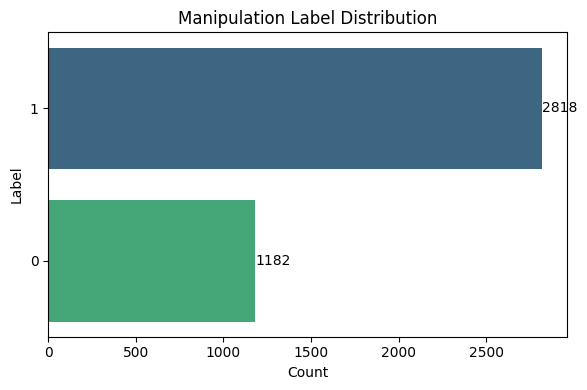

In [58]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(y='manipulative', data=df, order=df['manipulative'].value_counts().index,  palette="viridis")
# Loop through each container of bars and add labels
for container in ax.containers:
    ax.bar_label(container)



plt.title("Manipulation Label Distribution")
plt.xlabel("Count")
plt.ylabel("Label")
plt.tight_layout()
plt.show()

/tmp/ipython-input-50-2517403251.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tech_counts.values, y=tech_counts.index, palette="viridis")


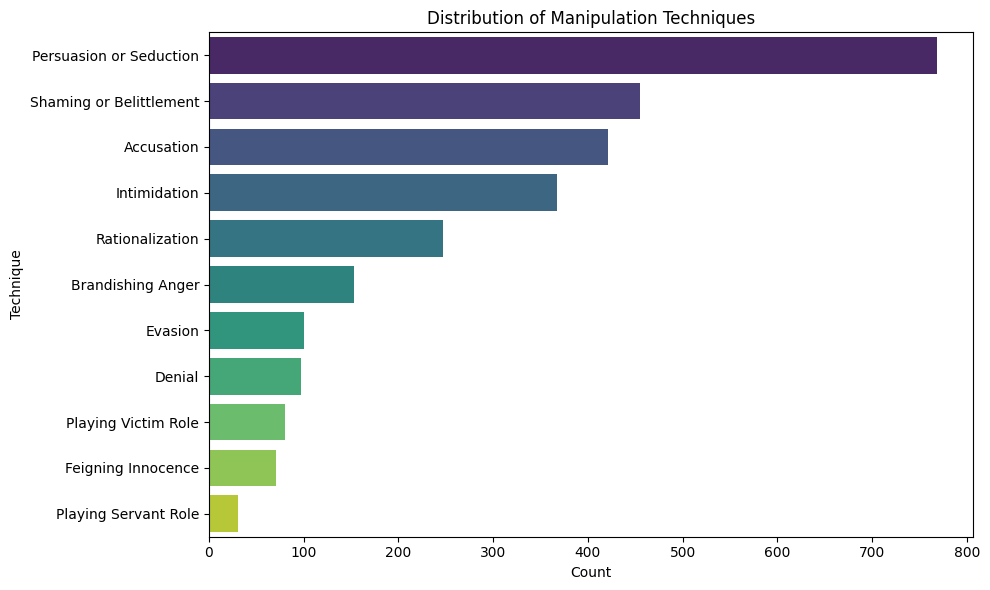

In [50]:
# Split and explode the 'technique' column
df_exploded = df['technique'].dropna().str.split(',').explode().str.strip()

# Count technique occurrences
tech_counts = df_exploded.value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=tech_counts.values, y=tech_counts.index, palette="viridis")
plt.title("Distribution of Manipulation Techniques")
plt.xlabel("Count")
plt.ylabel("Technique")
plt.tight_layout()
plt.show()

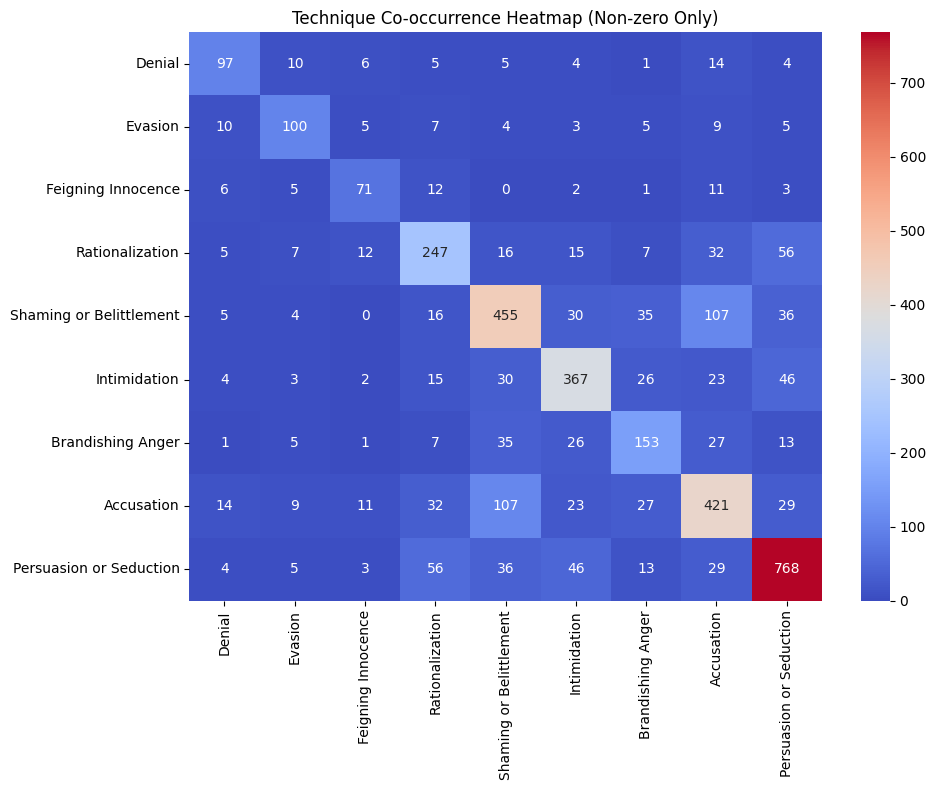

In [51]:

# Initialize binary matrix
tech_matrix = pd.DataFrame(0, index=df.index, columns=technique_labels)

# Populate matrix
for i, row in df['technique'].dropna().items():
    for tech in [t.strip() for t in row.split(',')]:
        if tech in technique_labels:
            tech_matrix.at[i, tech] = 1

# Compute co-occurrence matrix
co_matrix = tech_matrix.T.dot(tech_matrix)

# Remove rows/columns with only 0s (no co-occurrence)
co_matrix = co_matrix.loc[(co_matrix.sum(axis=1) > 0), (co_matrix.sum(axis=0) > 0)]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Technique Co-occurrence Heatmap (Non-zero Only)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-52-92002707.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vuln_counts.values, y=vuln_counts.index, palette="viridis")


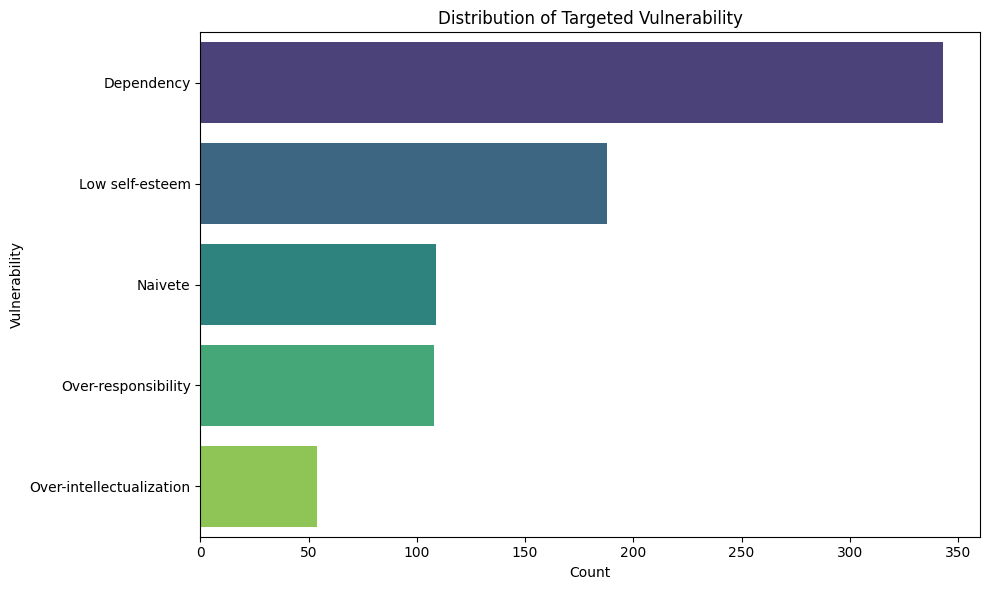

In [52]:
# Split and explode the 'vulnerability' column
df_exploded = df['vulnerability'].dropna().str.split(',').explode().str.strip()

# Count vulnerability occurrences
vuln_counts = df_exploded.value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=vuln_counts.values, y=vuln_counts.index, palette="viridis")
plt.title("Distribution of Targeted Vulnerability")
plt.xlabel("Count")
plt.ylabel("Vulnerability")
plt.tight_layout()
plt.show()

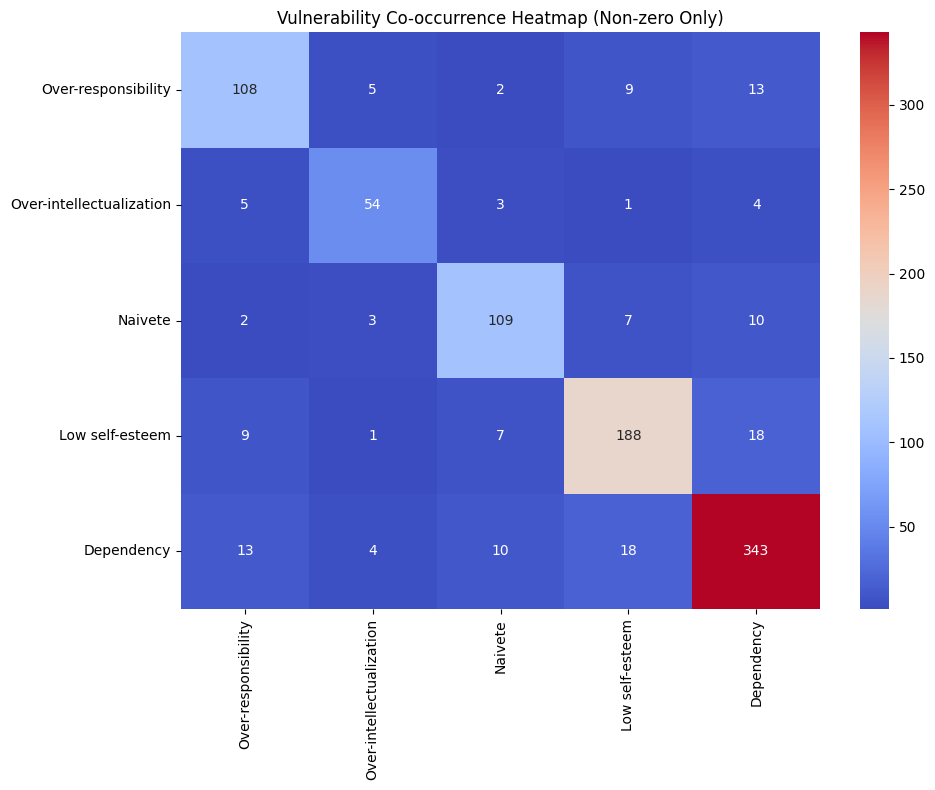

In [53]:
# Initialize binary matrix
vuln_matrix = pd.DataFrame(0, index=df.index, columns=vulnerability_labels)

# Populate matrix
for i, row in df['vulnerability'].dropna().items():
    for vuln in [t.strip() for t in row.split(',')]:
        if vuln in vulnerability_labels:
            vuln_matrix.at[i, vuln] = 1

# Compute co-occurrence matrix
co_matrix = vuln_matrix.T.dot(vuln_matrix)

# Remove rows/columns with only 0s (no co-occurrence)
co_matrix = co_matrix.loc[(co_matrix.sum(axis=1) > 0), (co_matrix.sum(axis=0) > 0)]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Vulnerability Co-occurrence Heatmap (Non-zero Only)")
plt.tight_layout()
plt.show()

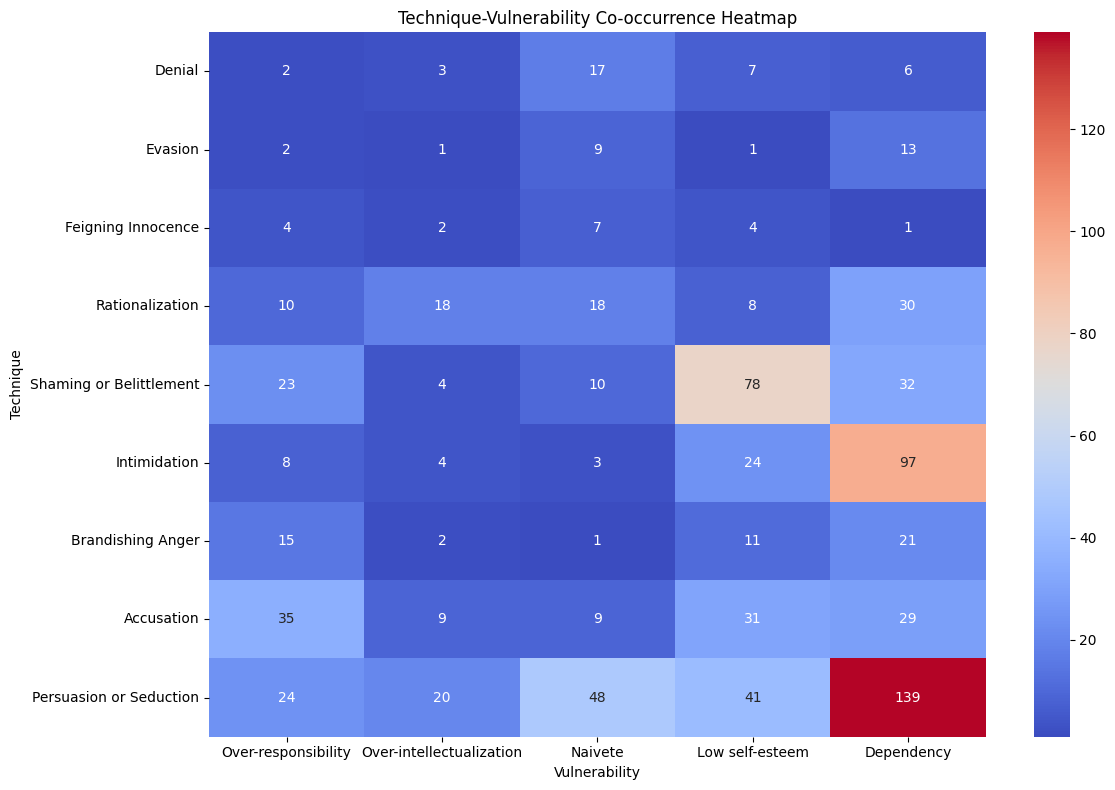

In [56]:

# Initialize binary matrices
tech_matrix = pd.DataFrame(0, index=df.index, columns=technique_labels)
vuln_matrix = pd.DataFrame(0, index=df.index, columns=vulnerability_labels)

# Populate technique matrix
for i, row in df['technique'].dropna().items():
    for tech in [t.strip() for t in row.split(',')]:
        if tech in technique_labels:
            tech_matrix.at[i, tech] = 1

# Populate vulnerability matrix
for i, row in df['vulnerability'].dropna().items():
    for vuln in [t.strip() for t in row.split(',')]:
        if vuln in vulnerability_labels:
            vuln_matrix.at[i, vuln] = 1

# Compute technique-vulnerability co-occurrence matrix
cross_matrix = tech_matrix.T.dot(vuln_matrix)

# Remove rows/columns with only 0s
cross_matrix = cross_matrix.loc[(cross_matrix.sum(axis=1) > 0), (cross_matrix.sum(axis=0) > 0)]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_matrix, annot=True, fmt="d",  cmap="coolwarm")
plt.title("Technique-Vulnerability Co-occurrence Heatmap")
plt.xlabel("Vulnerability")
plt.ylabel("Technique")
plt.tight_layout()
plt.show()


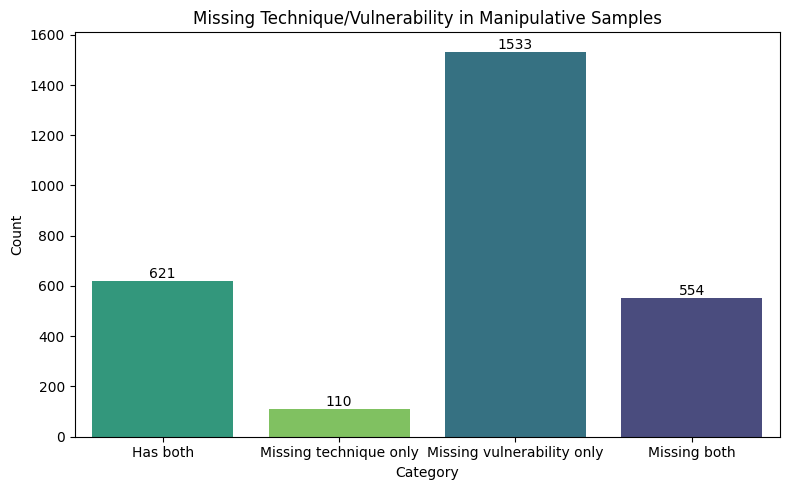

In [57]:
# Filter only manipulative samples (make a copy to avoid SettingWithCopyWarning)
manip_df = df[df['manipulative'] == 1].copy()

# Create flags for missing technique and vulnerability
manip_df.loc[:, 'missing_technique'] = manip_df['technique'].isna() | (manip_df['technique'].str.strip() == "")
manip_df.loc[:, 'missing_vulnerability'] = manip_df['vulnerability'].isna() | (manip_df['vulnerability'].str.strip() == "")

# Categorize the missing combinations
def categorize(row):
    if row['missing_technique'] and row['missing_vulnerability']:
        return 'Missing both'
    elif row['missing_technique']:
        return 'Missing technique only'
    elif row['missing_vulnerability']:
        return 'Missing vulnerability only'
    else:
        return 'Has both'

manip_df.loc[:, 'missing_category'] = manip_df.apply(categorize, axis=1)

# Plot the distribution without future warning
plt.figure(figsize=(8, 5))
ax=sns.countplot(data=manip_df, x='missing_category', hue='missing_category', palette="viridis", legend=False,
              order=['Has both', 'Missing technique only', 'Missing vulnerability only', 'Missing both'])
plt.title("Missing Technique/Vulnerability in Manipulative Samples")
plt.xlabel("Category")
plt.ylabel("Count")

# Loop through each container of bars and add labels
for container in ax.containers:
    ax.bar_label(container)



plt.tight_layout()
plt.show()